In [1]:
#Load Dataset

import pandas as pd
df = pd.read_csv("AirPassengers.csv")

In [2]:
print(df.head())

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


In [3]:
print(df.tail())

       Month  #Passengers
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432


In [4]:
#Change Month Column into Date Time Format
df['Month'] = pd.to_datetime(df['Month'])

In [5]:
print(df.head())

       Month  #Passengers
0 1949-01-01          112
1 1949-02-01          118
2 1949-03-01          132
3 1949-04-01          129
4 1949-05-01          121


In [6]:
df.index = df["Month"]
del df["Month"]

In [7]:
print(df.head())

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

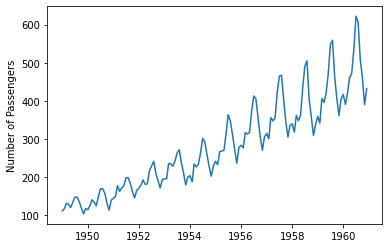

In [11]:
plt.plot(df)
plt.ylabel("Number of Passengers")
plt.show()

In [23]:
#7  months rolling means

rolling_mean = df.rolling(12).mean()

In [24]:
#7 months rolling standard deviation

rolling_std = df.rolling(12).std()

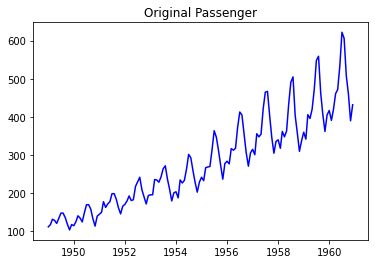

In [25]:
plt.plot(df, color="blue", label="Original Passenger")
plt.title("Original Passenger")
plt.show()

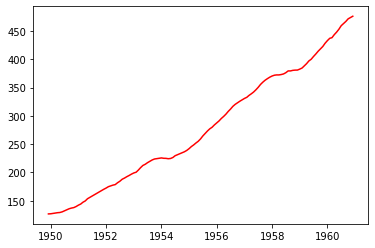

In [26]:
plt.plot(rolling_mean, color="red", label="Rolling mean Passenger")

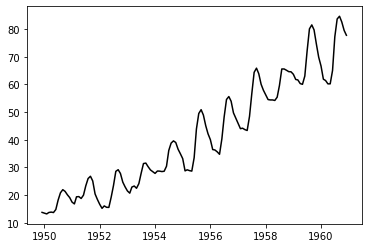

In [27]:
plt.plot(rolling_std, color="black",label="Rolling Standard Deviation in Passenger number")

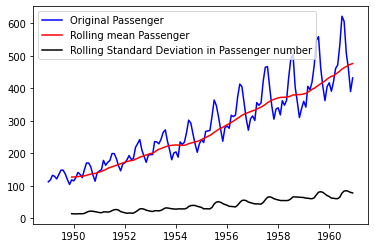

In [28]:
plt.plot(df, color="blue", label="Original Passenger")
plt.plot(rolling_mean, color="red", label="Rolling mean Passenger")
plt.plot(rolling_std, color="black",label="Rolling Standard Deviation in Passenger number")
plt.legend(loc="best")

In [29]:
#Dickey Adfuller Test
from statsmodels.tsa.stattools import adfuller

C:\Users\Hemavathi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Hemavathi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [36]:
adft = adfuller(df["#Passengers"], autolag="AIC")

print(adft)

output = pd.DataFrame({'Values': [adft[0], adft[1], adft[2], adft[3], adft[4]["1%"], adft[4]["5%"], adft[4]["10%"]], "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", "critical value (1%)", "critical value (5%)", "critical value (10%)"]})

print(output)

(0.8153688792060423, 0.9918802434376409, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.6929308390189)
       Values                       Metric
0    0.815369              Test Statistics
1    0.991880                      p-value
2   13.000000             No. of lags used
3  130.000000  Number of observations used
4   -3.481682          critical value (1%)
5   -2.884042          critical value (5%)
6   -2.578770         critical value (10%)


In [35]:
adft = adfuller(df["#Passengers"], autolag="AIC")

output = pd.Series(adft[0:4], index=["Test Statistics","p-value","No. of lags used","Number of observations used"])

for key, value in adft[4].items():
    output['Critical Value (%s)'%key] = value
print(output)

Test Statistics                  0.815369
p-value                          0.991880
No. of lags used                13.000000
Number of observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [37]:
autoc_lag1 = df["#Passengers"].autocorr(lag=1)

In [39]:
print("One Month Lag: ", autoc_lag1)

One Month Lag:  0.9601946480498523


In [40]:
autoc_lag6 = df["#Passengers"].autocorr(lag=6)
print("Six Month Lag: ", autoc_lag6)

Six Month Lag:  0.7839187959206183


In [41]:
autoc_lag9 = df["#Passengers"].autocorr(lag=9)
print("Nine Month Lag: ", autoc_lag9)

Nine Month Lag:  0.8278519011167601


C:\Users\HEMAVA~1\AppData\Local\Temp/ipykernel_15052/854191010.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead.
  dec = seasonal_decompose(df["#Passengers"], freq=12)


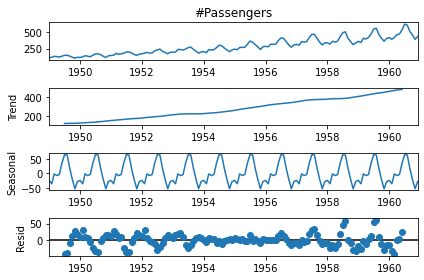

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose

dec = seasonal_decompose(df["#Passengers"], freq=12)
dec.plot()
plt.show()

C:\Users\HEMAVA~1\AppData\Local\Temp/ipykernel_15052/709510205.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["train"] = train["#Passengers"]
C:\Users\HEMAVA~1\AppData\Local\Temp/ipykernel_15052/709510205.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["test"] = test["#Passengers"]


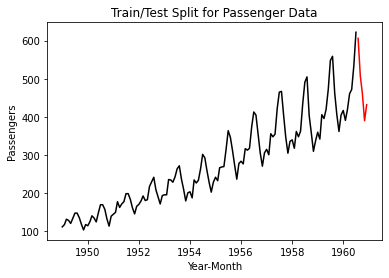

In [44]:
df["Date"] = df.index

train = df[df["Date"] < pd.to_datetime("1960-08")]
train["train"] = train["#Passengers"]

del train["Date"]
del train["#Passengers"]

test = df[df["Date"] >= pd.to_datetime("1960-08")]
del test["Date"]

test["test"] = test["#Passengers"]
del test["#Passengers"]

plt.plot(train, color="black")
plt.plot(test, color="red")
plt.xlabel("Year-Month")
plt.ylabel("Passengers")
plt.title("Train/Test Split for Passenger Data")

plt.show()

In [ ]:
#For Downloading the Arima
#!pip install pmdarima

In [ ]:
#If Any Appender Error with Stats Models
#Then Uninstall and reinstall statsmodels

In [45]:
from pmdarima.arima import auto_arima

In [52]:
model = auto_arima(train, trace=True, error_action = "ignore")
model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast, index = test.index, columns = ["Prediction"])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1352.593, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1340.702, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1336.259, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1352.415, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1329.986, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1335.098, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1336.923, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1329.407, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1335.407, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1339.796, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1325.560, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1336.3

In [48]:
#print(len(test))
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast, index = test.index, columns = ["Prediction"])

<AxesSubplot:xlabel='Month'>

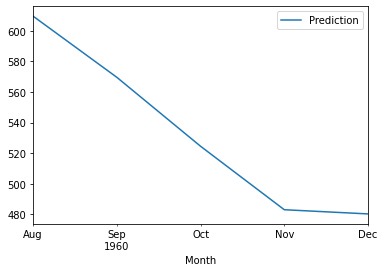

In [50]:

forecast.plot()

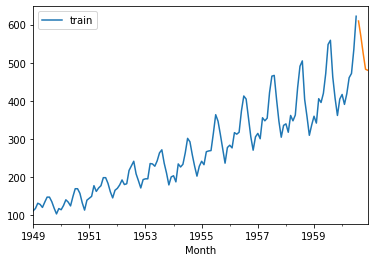

In [54]:
train.plot()
forecast["Prediction"].plot()
plt.show()